In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os




<Figure size 1000x500 with 0 Axes>

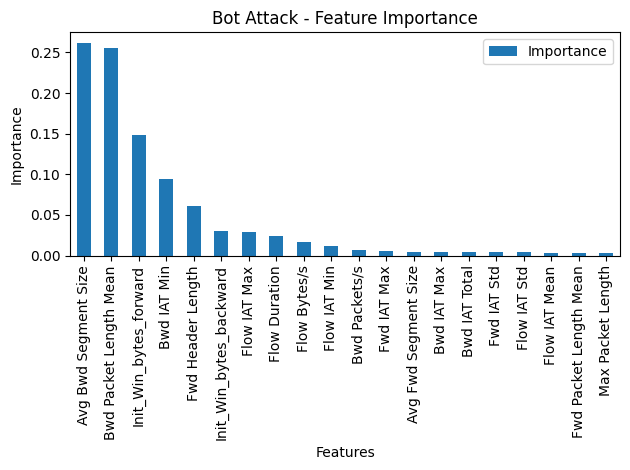

<Figure size 1000x500 with 0 Axes>

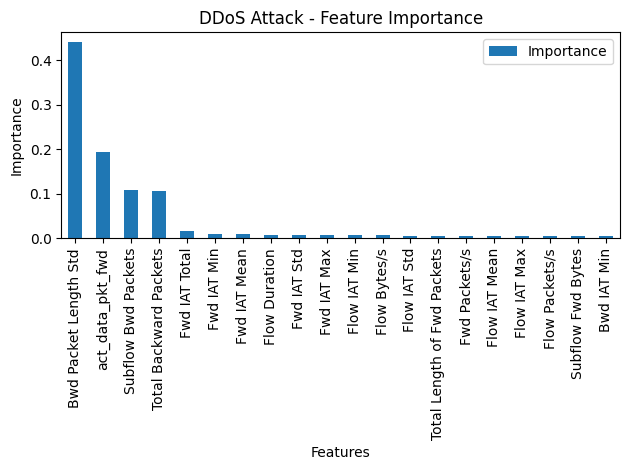

<Figure size 1000x500 with 0 Axes>

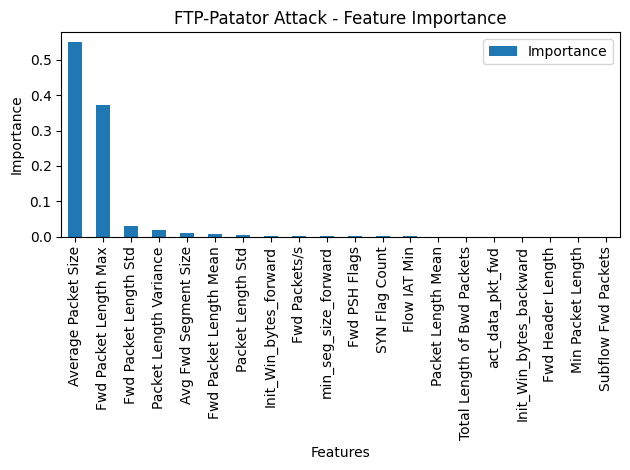

<Figure size 1000x500 with 0 Axes>

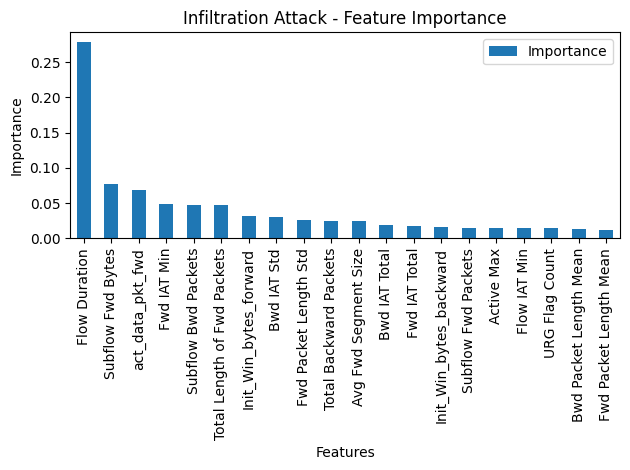

<Figure size 1000x500 with 0 Axes>

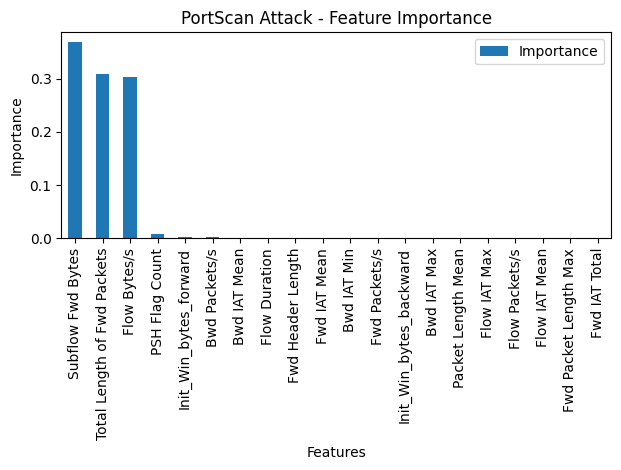

<Figure size 1000x500 with 0 Axes>

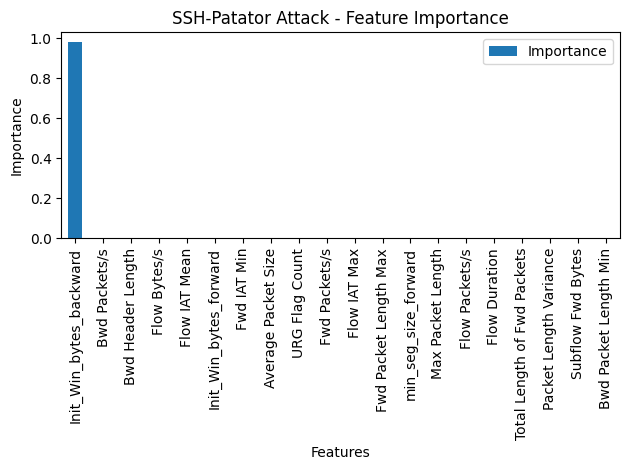

In [2]:

from sklearn.ensemble import RandomForestRegressor
csv_files=os.listdir("attacks")
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]


for j in csv_files:
    df = pd.read_csv("./attacks/" + j, usecols=main_labels).fillna(0)
    df['Label'] = df['Label'].apply(lambda x: 1 if x == "BENIGN" else 0)
    y = df["Label"].values
    X = df.drop(columns="Label").values.astype(np.float32)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
    forest = RandomForestRegressor(n_estimators=250, random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    top_features = df.columns[sorted_indices[:20]]

    df[top_features].to_csv(f"./attacks/{j[:-4]}imp_feature.csv")
    top_importances = importances[sorted_indices[:20]]
    impor_bars = pd.DataFrame({'Features': top_features, 'Importance': top_importances}).set_index('Features')
    plt.figure(figsize=(10, 5))
    impor_bars.plot.bar()
    plt.title(f"{j[:-4]} Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
